# FFT Y Filstros con Audio

In [30]:

import numpy as np   # funciones matemáticas
import matplotlib.pyplot as plt # graficos
from scipy.io import wavfile as waves # importar audio
from IPython.display import Audio  # procesar audio
import scipy.fftpack as fourier # fft pack
import pyaudio as pa  # procesar audio
import struct 


## Ejemplos de señales de audio
Librería a instalar:
!pip install pyaudio

### Cargar en memoria una nota musical

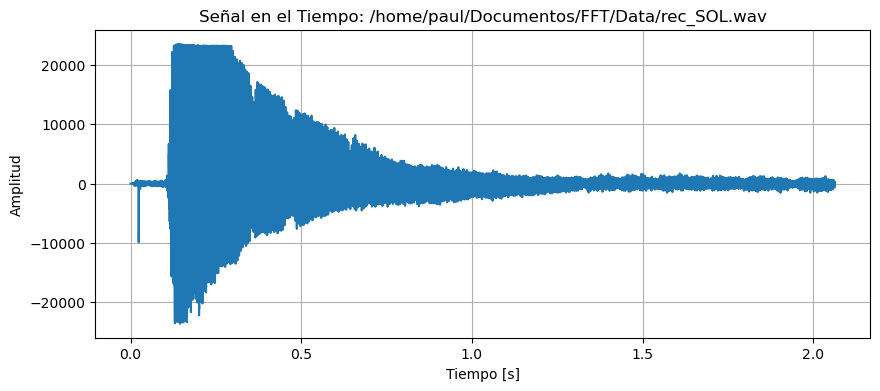

In [31]:

filename = '/home/paul/Documentos/FFT/Data/rec_SOL.wav'

# Leemos el archivo
Fs, data = waves.read(filename)

# Si el audio es estéreo, tomamos un solo canal para análisis (monoaural)
if len(data.shape) > 1:
    Audio_m = data[:, 0]
else:
    Audio_m = data

L = len(Audio_m)   # tamaño de la señal
n = np.arange(0, L) / Fs # Teorema de muestreo

# --- REPRODUCCIÓN ---
# En lugar de winsound, usamos esto:
display(Audio(Audio_m, rate=Fs))

# --- VISUALIZACIÓN ---
plt.figure(figsize=(10, 4))
plt.plot(n, Audio_m)
plt.title(f"Señal en el Tiempo: {filename}")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

In [32]:
print(Audio_m.shape) # tamañó de la señal
print(L)

(91008,)
91008


### FFT

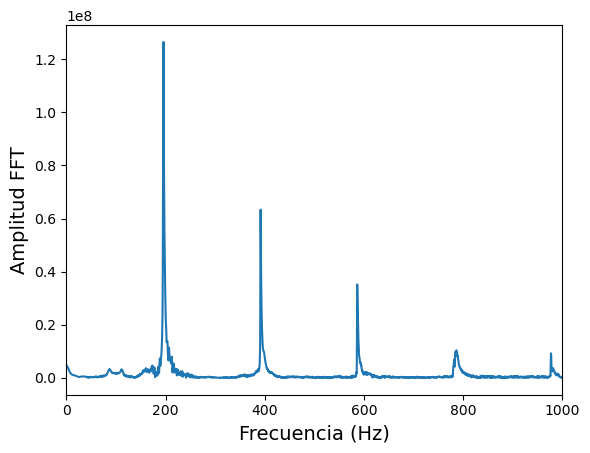

In [33]:
gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.xlim(0,1000)
plt.show()

### Imprimir frecuencia central

In [34]:
Posm = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT
print("La nota está en la frecuencia: ",F_fund)



La nota está en la frecuencia:  [195.76740506]


### Clasificador de notas
![Notas musicales](/home/paul/Documentos/FFT/Data/FRECUENCIAS_OCTAVAS_3_Y_4.png)

In [35]:
if F_fund > 135 and F_fund < 155:                   # Rango de frecuencias para nota RE
    print("La nota es RE, con frecuencia: ",F_fund)
elif F_fund > 190 and F_fund < 210:                   # Rango de frecuencias para nota SOL
    print("La nota es SOL, con frecuencia: ",F_fund)
elif F_fund > 235 and F_fund < 255:                     # Rango de frecuencias para nota SI
    print("La nota es SI, con frecuencia: ",F_fund)
elif F_fund > 320 and F_fund < 340:                   # Rango de frecuencias para nota MI
    print("La nota es MI, con frecuencia: ",F_fund)

La nota es SOL, con frecuencia:  [195.76740506]


### Cargar una nueva nota

## Grabar audio

ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'


Grabando por 3 segundos...
Grabación finalizada.
Archivo guardado como: /home/paul/Documentos/FFT/Data/grabacion.wav


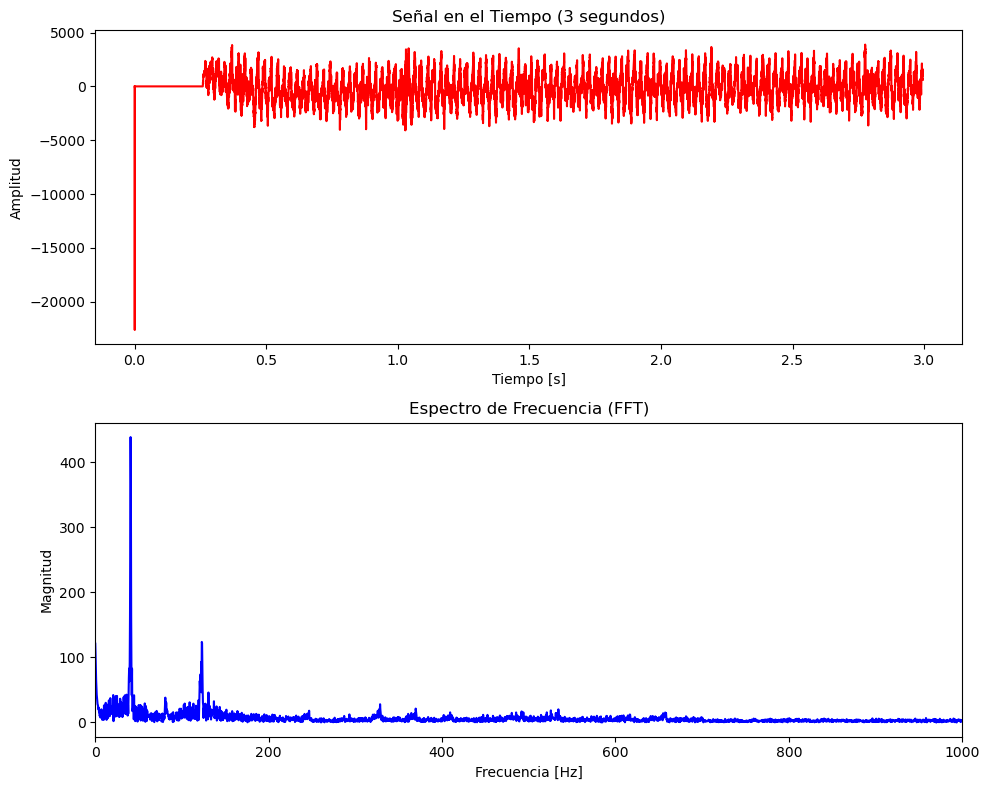

In [37]:

import pyaudio as pa
import numpy as np
import matplotlib.pyplot as plt
import wave
import struct

# --- CONFIGURACIÓN ---
FRAMES = 1024
FORMAT = pa.paInt16
CHANNELS = 1
Fs = 44100
segundos = 3
filename = "/home/paul/Documentos/FFT/Data/grabacion.wav"

p = pa.PyAudio()

# --- GRABACIÓN ---
print(f"Grabando por {segundos} segundos...")

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=Fs,
    input=True,
    frames_per_buffer=FRAMES
)

frames_totales = []

# Calculamos cuántos paquetes leer para completar 3 segundos
for i in range(0, int(Fs / FRAMES * segundos)):
    data = stream.read(FRAMES)
    frames_totales.append(data)

print("Grabación finalizada.")

# Detener y cerrar stream
stream.stop_stream()
stream.close()
p.terminate()

# --- GUARDAR ARCHIVO .WAV ---
wf = wave.open(filename, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(Fs)
wf.writeframes(b''.join(frames_totales))
wf.close()
print(f"Archivo guardado como: {filename}")

# --- PROCESAMIENTO ---
# Convertimos la lista de bytes a un array de numpy (int16)
data_raw = b''.join(frames_totales)
audio_int = np.frombuffer(data_raw, dtype=np.int16)

# Tiempo y FFT
L = len(audio_int)
n = np.arange(0, L) / Fs  # Vector de tiempo
fft_audio = np.fft.fft(audio_int)
# Calculamos magnitud y normalizamos
M_gk = abs(fft_audio) / L
# Vector de frecuencias
F = np.fft.fftfreq(L, 1/Fs)

# --- GRÁFICAS ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfica temporal
ax1.plot(n, audio_int, color='r')
ax1.set_title("Señal en el Tiempo (3 segundos)")
ax1.set_xlabel("Tiempo [s]")
ax1.set_ylabel("Amplitud")

# Gráfica de frecuencia (Magnitud)
# Graficamos solo la mitad positiva y limitamos hasta 5000Hz para mejor visualización
mitad = L // 2
ax2.plot(F[:mitad], M_gk[:mitad], color='b')
ax2.set_title("Espectro de Frecuencia (FFT)")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Magnitud")
ax2.set_xlim(0, 1000) 

plt.tight_layout()
plt.show()

### Filtro pasa bajos

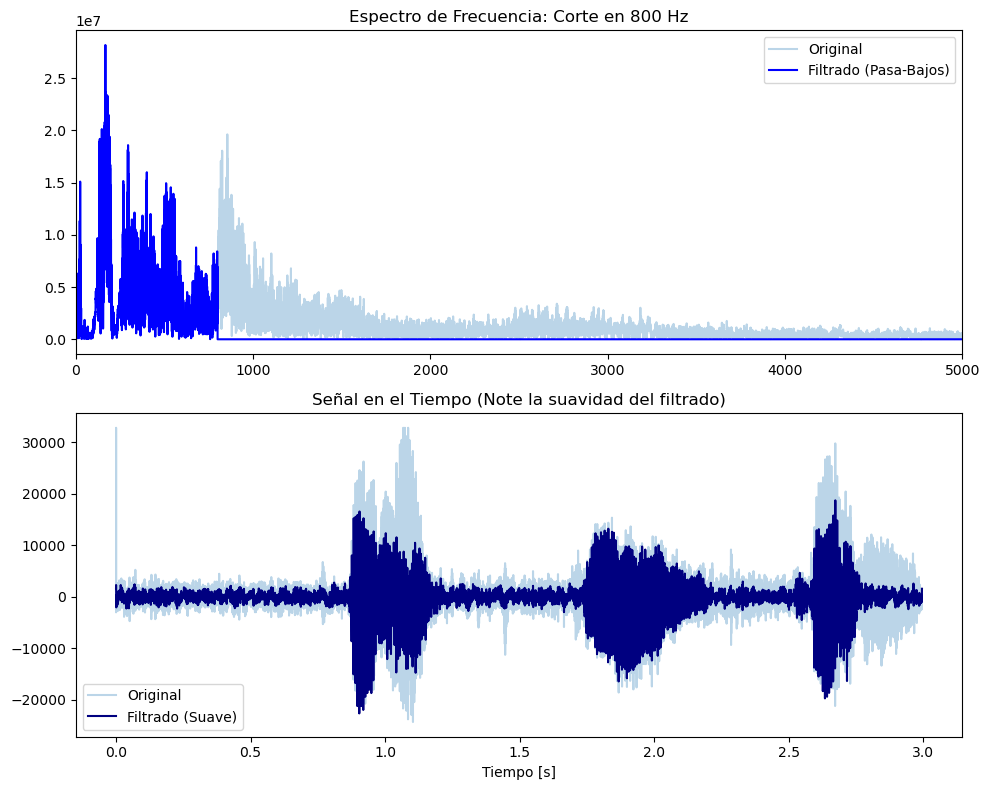

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as waves

# 1. CARGAR EL ARCHIVO
filename = '/home/paul/Documentos/FFT/Data/grabacion_1.wav' 
Fs, data = waves.read(filename)

# Si es estéreo, tomamos un canal
if len(data.shape) > 1:
    audio = data[:, 0]
else:
    audio = data

L = len(audio)
n = np.arange(0, L) / Fs

# 2. PROCESAMIENTO FFT
X_fft = np.fft.fft(audio)
frecuencias = np.fft.fftfreq(L, 1/Fs)

# 3. CREAR FILTRO PASA-BAJOS (Low-Pass)
# Definimos la frecuencia de corte (frecuencias arriba de esta se borran)
fc = 800

# Máscara: 1 para frecuencias menores a fc, 0 para el resto
filtro_mask = np.abs(frecuencias) < fc

# Aplicamos el filtro en el espectro
X_filtered = X_fft * filtro_mask

# 4. REGRESO AL TIEMPO (IFFT)
audio_filtered = np.fft.ifft(X_filtered)
audio_filtered = np.real(audio_filtered)

# 5. GRAFICACIÓN
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Espectro original vs Filtrado
ax1.plot(frecuencias[:L//2], np.abs(X_fft[:L//2]), label="Original", alpha=0.3)
ax1.plot(frecuencias[:L//2], np.abs(X_filtered[:L//2]), label="Filtrado (Pasa-Bajos)", color='b')
ax1.set_title(f"Espectro de Frecuencia: Corte en {fc} Hz")
ax1.set_xlim(0, 5000)
ax1.legend()

# Señal en el tiempo
ax2.plot(n, audio, label="Original", alpha=0.3)
ax2.plot(n, audio_filtered, label="Filtrado (Suave)", color='navy')
ax2.set_title("Señal en el Tiempo (Note la suavidad del filtrado)")
ax2.set_xlabel("Tiempo [s]")
ax2.legend()

plt.tight_layout()
plt.show()

# Guardar el audio filtrado (Suena como si hablaras a través de una pared)
waves.write('/home/paul/Documentos/FFT/Data/grabacion_pasa_bajos.wav', Fs, audio_filtered.astype(np.int16))

### Filtro pasa altos

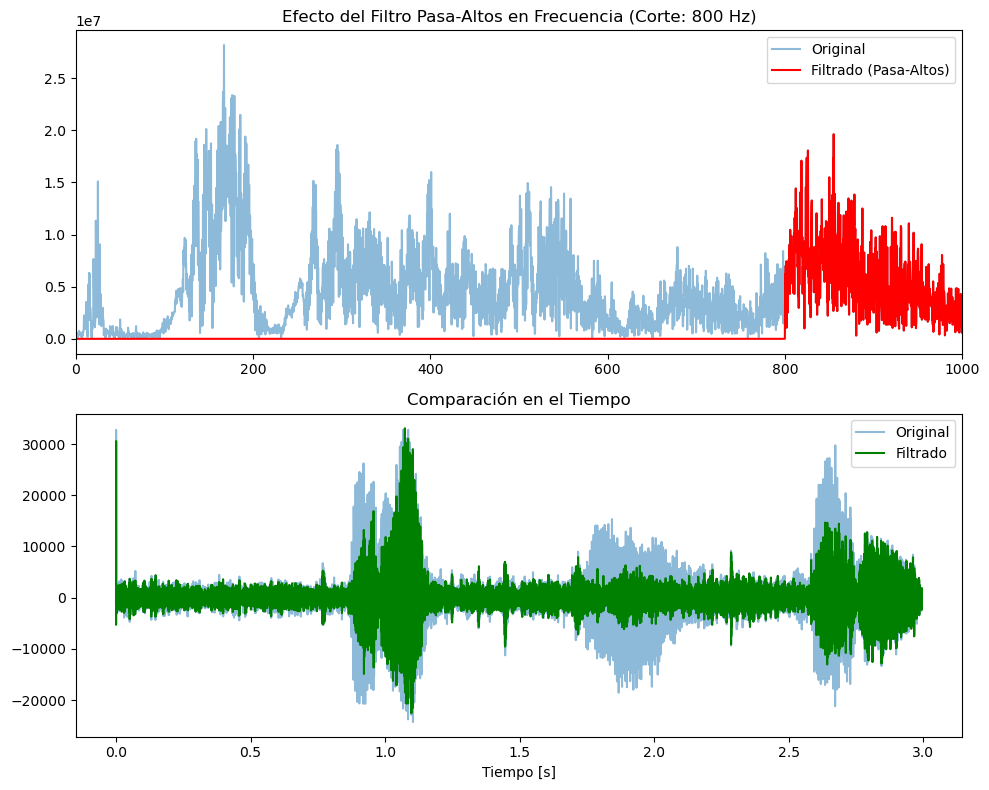

In [39]:


# 1. CARGAR EL ARCHIVO
filename = '/home/paul/Documentos/FFT/Data/grabacion_1.wav'  # Asegúrate de que el nombre coincida
Fs, data = waves.read(filename)

# Si es estéreo, tomamos un canal
if len(data.shape) > 1:
    audio = data[:, 0]
else:
    audio = data

L = len(audio)
n = np.arange(0, L) / Fs

# 2. PROCESAMIENTO FFT
X_fft = np.fft.fft(audio)
frecuencias = np.fft.fftfreq(L, 1/Fs)

# 3. CREAR FILTRO PASA-ALTOS (High-Pass)
# Definimos la frecuencia de corte
fc = 800

# Creamos la máscara: 0 para frecuencias menores a fc, 1 para el resto
# Aplicamos el valor absoluto a las frecuencias para afectar ambos lados del espectro
filtro_mask = np.abs(frecuencias) > fc

# Aplicamos el filtro en el dominio de la frecuencia
X_filtered = X_fft * filtro_mask

# 4. REGRESO AL TIEMPO (IFFT)
audio_filtered = np.fft.ifft(X_filtered)
audio_filtered = np.real(audio_filtered) # Tomamos la parte real

# 5. GRAFICACIÓN
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Espectro original vs Filtrado
ax1.plot(frecuencias[:L//2], np.abs(X_fft[:L//2]), label="Original", alpha=0.5)
ax1.plot(frecuencias[:L//2], np.abs(X_filtered[:L//2]), label="Filtrado (Pasa-Altos)", color='r')
ax1.set_title(f"Efecto del Filtro Pasa-Altos en Frecuencia (Corte: {fc} Hz)")
ax1.set_xlim(0, 1000)
ax1.legend()

# Señal en el tiempo
ax2.plot(n, audio, label="Original", alpha=0.5)
ax2.plot(n, audio_filtered, label="Filtrado", color='g')
ax2.set_title("Comparación en el Tiempo")
ax2.set_xlabel("Tiempo [s]")
ax2.legend()

plt.tight_layout()
plt.show()

# OPCIONAL: Guardar el resultado
waves.write('/home/paul/Documentos/FFT/Data/grabacion_pasa_altos.wav', Fs, audio_filtered.astype(np.int16))

## Filtros

IIR

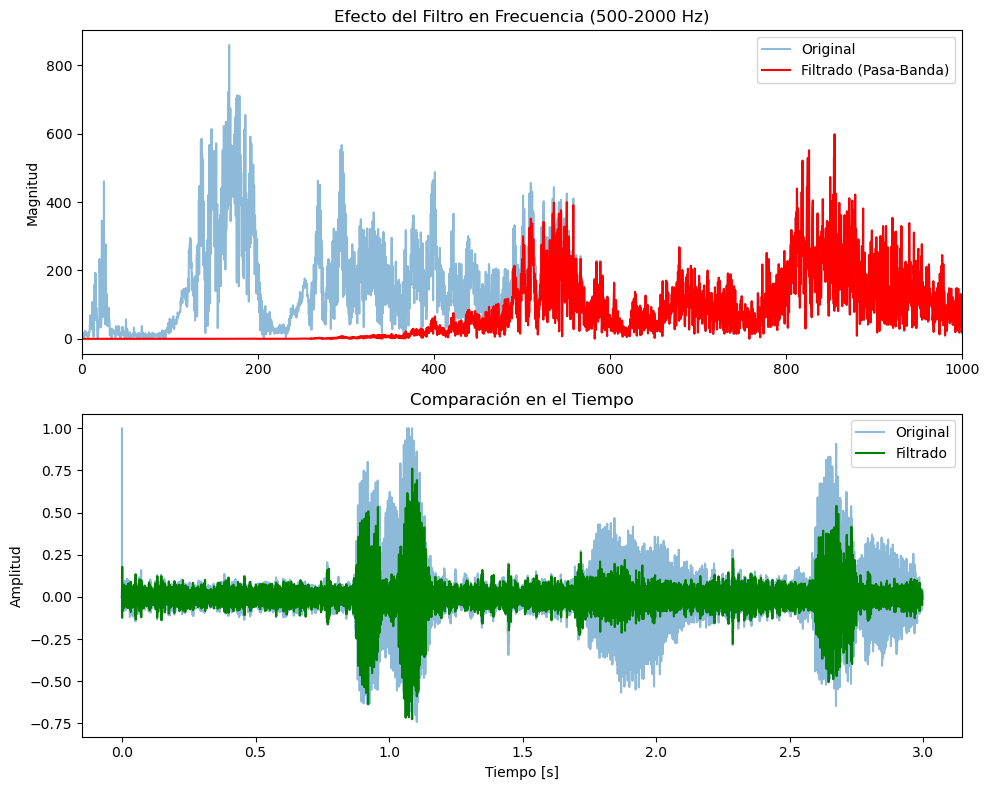

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as waves
from scipy.signal import butter, lfilter

# 1. CARGAR EL ARCHIVO
filename = '/home/paul/Documentos/FFT/Data/grabacion_1.wav'
Fs, data = waves.read(filename)

# Si es estéreo, convertir a mono para evitar errores en el filtrado
if len(data.shape) > 1:
    data = data[:, 0]

# Normalizar audio para cálculos de FFT
data_norm = data / np.max(np.abs(data))
L = len(data_norm)

# 2. ANÁLISIS PRE-FILTRADO (FFT Original)
X_fft = np.fft.fft(data_norm)
frecuencias = np.fft.fftfreq(L, 1/Fs)

from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # 'low' permite el paso de frecuencias debajo del corte
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # 'high' permite el paso de frecuencias por encima del corte
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# 3. DISEÑO Y APLICACIÓN DEL FILTRO IIR
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

lowcut, highcut = 500, 2000
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)

# Aplicar filtro (Esto ya devuelve el audio en el DOMINIO DEL TIEMPO)
audio_filtrado_iir = lfilter(b, a, data_norm)

# 4. ANÁLISIS POST-FILTRADO (FFT para graficar el efecto)
X_fft_filtrado = np.fft.fft(audio_filtrado_iir)

# 5. GRAFICACIÓN
# Definimos el eje de tiempo para la segunda gráfica
t = np.arange(L) / Fs

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Espectro original vs Filtrado
ax1.plot(frecuencias[:L//2], np.abs(X_fft[:L//2]), label="Original", alpha=0.5)
ax1.plot(frecuencias[:L//2], np.abs(X_fft_filtrado[:L//2]), label="Filtrado (Pasa-Banda)", color='r')
ax1.set_title(f"Efecto del Filtro en Frecuencia ({lowcut}-{highcut} Hz)")
ax1.set_xlim(0, 1000) # Zoom a la zona de interés
ax1.set_ylabel("Magnitud")
ax1.legend()

# Señal en el tiempo
ax2.plot(t, data_norm, label="Original", alpha=0.5)
ax2.plot(t, audio_filtrado_iir, label="Filtrado", color='g')
ax2.set_title("Comparación en el Tiempo")
ax2.set_xlabel("Tiempo [s]")
ax2.set_ylabel("Amplitud")
ax2.legend()

plt.tight_layout()
plt.show()

# 6. GUARDAR EL RESULTADO (Escalar de nuevo a int16)
audio_final = (audio_filtrado_iir * 32767).astype(np.int16)
waves.write('/home/paul/Documentos/FFT/Data/grabacion_iir.wav', Fs, audio_final)

In [41]:
# 1. Aplicar Pasa Bajos (Corta todo lo superior a 3000 Hz)
cutoff_low = 400.0
b_low, a_low = butter_lowpass(cutoff_low, Fs, order=6)
audio_lowpass = lfilter(b_low, a_low, data_norm)

# 2. Aplicar Pasa Altos (Corta todo lo inferior a 100 Hz)
cutoff_high = 400.0
b_high, a_high = butter_highpass(cutoff_high, Fs, order=6)
audio_highpass = lfilter(b_high, a_high, data_norm)

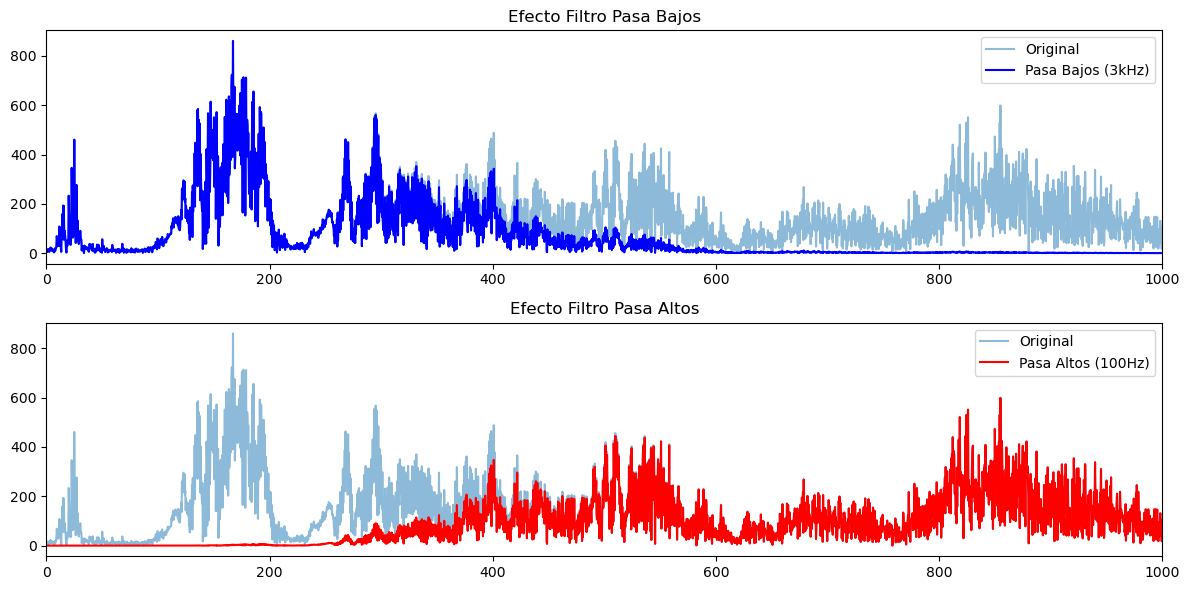

In [42]:
import matplotlib.pyplot as plt

def get_fft(signal, fs):
    L = len(signal)
    freqs = np.fft.fftfreq(L, 1/fs)
    mag = np.abs(np.fft.fft(signal))
    return freqs[:L//2], mag[:L//2]

# Obtener FFTs
f, mag_orig = get_fft(data_norm, Fs)
_, mag_low = get_fft(audio_lowpass, Fs)
_, mag_high = get_fft(audio_highpass, Fs)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(f, mag_orig, label="Original", alpha=0.5)
plt.plot(f, mag_low, label="Pasa Bajos (3kHz)", color='blue')
plt.title("Efecto Filtro Pasa Bajos")
plt.xlim(0, 1000)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(f, mag_orig, label="Original", alpha=0.5)
plt.plot(f, mag_high, label="Pasa Altos (100Hz)", color='red')
plt.title("Efecto Filtro Pasa Altos")
plt.xlim(0, 1000) # Zoom en bajos
plt.legend()

plt.tight_layout()
plt.show()

## Canciones

/tmp/ipykernel_369273/1480939050.py:77: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


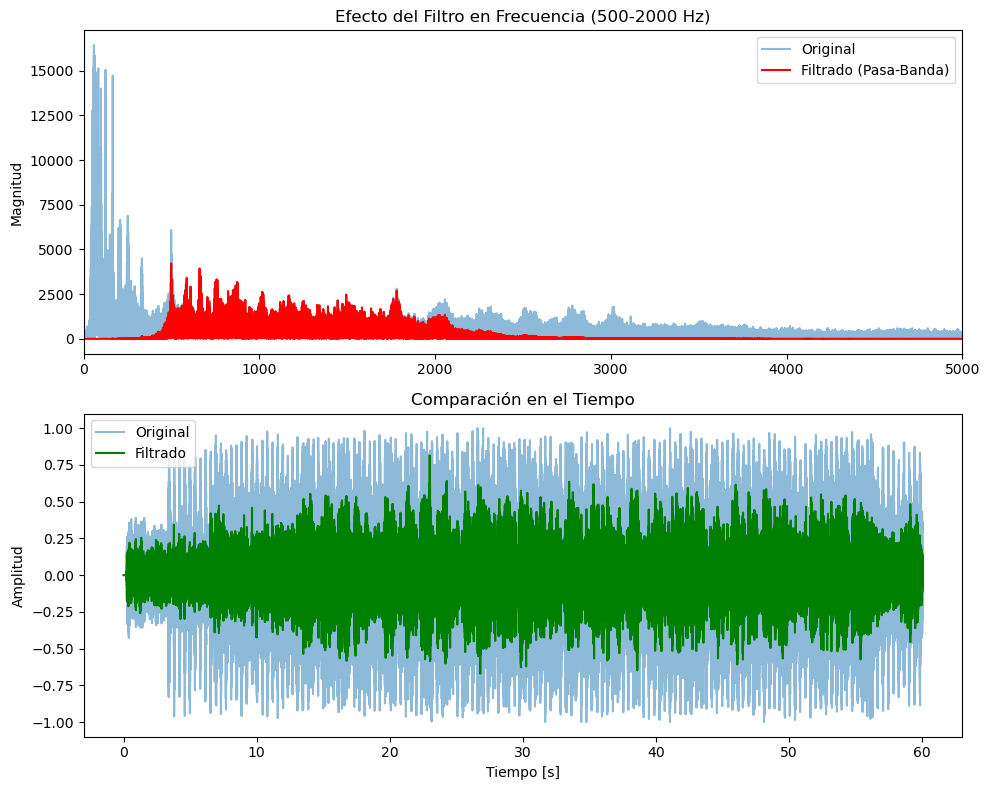

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as waves
from scipy.signal import butter, lfilter

# 1. CARGAR EL ARCHIVO
filename = '/home/paul/Documentos/FFT/Data/Idles.wav'
Fs, data = waves.read(filename)

# Si es estéreo, convertir a mono para evitar errores en el filtrado
if len(data.shape) > 1:
    data = data[:, 0]

# Normalizar audio para cálculos de FFT
data_norm = data / np.max(np.abs(data))
L = len(data_norm)

# 2. ANÁLISIS PRE-FILTRADO (FFT Original)
X_fft = np.fft.fft(data_norm)
frecuencias = np.fft.fftfreq(L, 1/Fs)

from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # 'low' permite el paso de frecuencias debajo del corte
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # 'high' permite el paso de frecuencias por encima del corte
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# 3. DISEÑO Y APLICACIÓN DEL FILTRO IIR
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

lowcut, highcut = 500, 2000
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)

# Aplicar filtro (Esto ya devuelve el audio en el DOMINIO DEL TIEMPO)
audio_filtrado_iir = lfilter(b, a, data_norm)

# 4. ANÁLISIS POST-FILTRADO (FFT para graficar el efecto)
X_fft_filtrado = np.fft.fft(audio_filtrado_iir)

# 5. GRAFICACIÓN
# Definimos el eje de tiempo para la segunda gráfica
t = np.arange(L) / Fs

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Espectro original vs Filtrado
ax1.plot(frecuencias[:L//2], np.abs(X_fft[:L//2]), label="Original", alpha=0.5)
ax1.plot(frecuencias[:L//2], np.abs(X_fft_filtrado[:L//2]), label="Filtrado (Pasa-Banda)", color='r')
ax1.set_title(f"Efecto del Filtro en Frecuencia ({lowcut}-{highcut} Hz)")
ax1.set_xlim(0, 5000) # Zoom a la zona de interés
ax1.set_ylabel("Magnitud")
ax1.legend()

# Señal en el tiempo
ax2.plot(t, data_norm, label="Original", alpha=0.5)
ax2.plot(t, audio_filtrado_iir, label="Filtrado", color='g')
ax2.set_title("Comparación en el Tiempo")
ax2.set_xlabel("Tiempo [s]")
ax2.set_ylabel("Amplitud")
ax2.legend()

plt.tight_layout()
plt.show()

# 6. GUARDAR EL RESULTADO (Escalar de nuevo a int16)
audio_final = (audio_filtrado_iir * 32767).astype(np.int16)
waves.write('/home/paul/Documentos/FFT/Data/grabacion_iir_2.wav', Fs, audio_final)

## IIR


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin, lfilter

def fir_lowpass(cutoff, fs, ntaps=101):
    # ntaps debe ser preferiblemente impar
    nyq = 0.5 * fs
    taps = firwin(ntaps, cutoff / nyq, window='hamming')
    return taps

def fir_highpass(cutoff, fs, ntaps=101):
    nyq = 0.5 * fs
    # Para pasa-altos, ntaps DEBE ser impar
    taps = firwin(ntaps, cutoff / nyq, pass_zero=False, window='hamming')
    return taps

def fir_bandpass(lowcut, highcut, fs, ntaps=101):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut / nyq, highcut / nyq], pass_zero=False, window='hamming')
    return taps

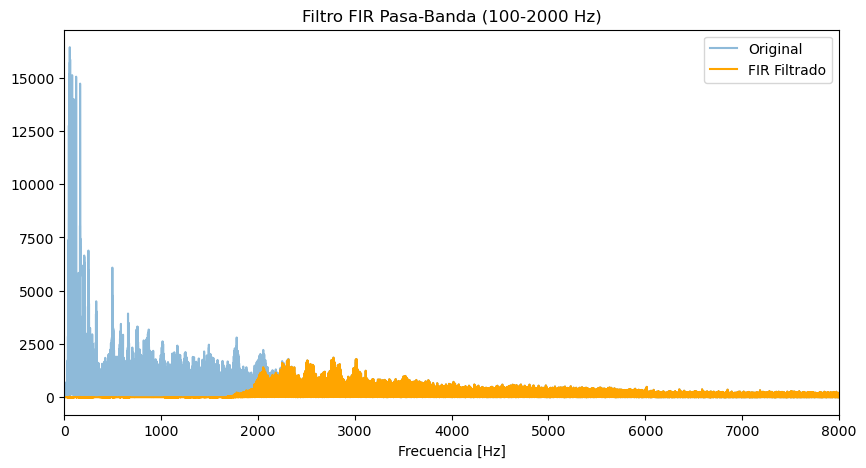

In [52]:
# 1. Cargar archivo
filename = '/home/paul/Documentos/FFT/Data/Idles.wav'
fs, data = wavfile.read(filename)

# Convertir a mono y normalizar
if len(data.shape) > 1: data = data[:, 0]
data_norm = data / np.max(np.abs(data))

# 2. Diseñar y Aplicar Filtro FIR Pasa-Banda
# Usamos 201 taps para una caída más definida
low, high = 100, 2000
#taps = fir_bandpass(low, high, fs, ntaps=201)
taps =  fir_highpass(high,fs, ntaps=201)
# Aplicar el filtro (En FIR 'a' siempre es 1.0)
audio_filtrado = lfilter(taps, 1.0, data_norm)

# 3. Visualización (FFT)
L = len(data_norm)
freqs = np.fft.fftfreq(L, 1/fs)
fft_orig = np.abs(np.fft.fft(data_norm))
fft_filt = np.abs(np.fft.fft(audio_filtrado))

plt.figure(figsize=(10, 5))
plt.plot(freqs[:L//2], fft_orig[:L//2], label="Original", alpha=0.5)
plt.plot(freqs[:L//2], fft_filt[:L//2], label="FIR Filtrado", color='orange')
plt.title(f"Filtro FIR Pasa-Banda ({low}-{high} Hz)")
plt.xlabel("Frecuencia [Hz]")
plt.xlim(0, 8000)
plt.legend()
plt.show()

# 4. Guardar
audio_final = (audio_filtrado * 32767).astype(np.int16)
wavfile.write('/home/paul/Documentos/FFT/Data/grabacion_iir_3.wav', fs, audio_final)